In [1]:
# import dependencies
from keras import backend as K
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot


Using TensorFlow backend.


In [2]:
# generate a toy dataset of only two features and four label classes
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2, random_state=2)


In [3]:
# let's take a look at the label (y) before one-hot encoding
y

array([2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 0, 2, 2, 3, 2, 1, 3, 0,
       0, 3, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 1, 3, 3, 1, 2,
       3, 0, 0, 1, 1, 0, 0, 3, 0, 3, 2, 3, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3,
       0, 1, 3, 0, 2, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3,
       1, 2, 3, 0, 2, 0, 1, 2, 2, 0, 3, 0, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       0, 3, 1, 3, 0, 0, 0, 0, 2, 2, 0, 3, 0, 2, 1, 2, 3, 0, 1, 0, 2, 0,
       0, 0, 1, 0, 3, 2, 1, 1, 3, 1, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0,
       1, 1, 1, 3, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 3, 3, 0, 3, 2,
       1, 2, 2, 3, 3, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 3, 2, 2, 1, 0, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 0, 2, 0, 2, 3, 3, 0, 3, 0, 3, 0, 3,
       2, 3, 3, 0, 2, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 2, 3, 1, 1,
       3, 2, 0, 0, 2, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 2, 3, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 3, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 2, 3, 1, 3, 0,
       2, 0, 2, 3, 2, 1, 3, 1, 2, 1, 2, 0, 3, 0, 3,

In [4]:
# one-hot encode output variable
y = to_categorical(y)
print(y)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [5]:
# split into 80% training data and 20% test data 
# note that we did not create a validation dataset in this example for simplicity
n_train = 200
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

(200, 2) (800, 2)


In [6]:
# develop the baseline model architecture
# here we are building a very simple, two-layer network
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax')) # four hidden units because we have 4 label classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 104       
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [7]:
# train the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1)

Train on 200 samples, validate on 800 samples
Epoch 1/500
200/200 [==============================] - 0s 554us/step - loss: 1.7862 - accuracy: 0.2500 - val_loss: 1.7178 - val_accuracy: 0.2663
Epoch 2/500
200/200 [==============================] - 0s 91us/step - loss: 1.6395 - accuracy: 0.2650 - val_loss: 1.5710 - val_accuracy: 0.2763
Epoch 3/500
200/200 [==============================] - 0s 88us/step - loss: 1.4964 - accuracy: 0.2850 - val_loss: 1.4395 - val_accuracy: 0.2788
Epoch 4/500
200/200 [==============================] - 0s 90us/step - loss: 1.3691 - accuracy: 0.2950 - val_loss: 1.3193 - val_accuracy: 0.2825
Epoch 5/500
200/200 [==============================] - 0s 88us/step - loss: 1.2535 - accuracy: 0.3650 - val_loss: 1.2095 - val_accuracy: 0.4150
Epoch 6/500
200/200 [==============================] - 0s 82us/step - loss: 1.1510 - accuracy: 0.4850 - val_loss: 1.1122 - val_accuracy: 0.4787
Epoch 7/500
200/200 [==============================] - 0s 78us/step - loss: 1.0593 - accu

200/200 [==============================] - 0s 73us/step - loss: 0.5188 - accuracy: 0.8050 - val_loss: 0.5740 - val_accuracy: 0.7563
Epoch 58/500
200/200 [==============================] - 0s 74us/step - loss: 0.5166 - accuracy: 0.8050 - val_loss: 0.5715 - val_accuracy: 0.7550
Epoch 59/500
200/200 [==============================] - 0s 76us/step - loss: 0.5153 - accuracy: 0.8100 - val_loss: 0.5689 - val_accuracy: 0.7563
Epoch 60/500
200/200 [==============================] - 0s 78us/step - loss: 0.5141 - accuracy: 0.8100 - val_loss: 0.5690 - val_accuracy: 0.7563
Epoch 61/500
200/200 [==============================] - 0s 71us/step - loss: 0.5114 - accuracy: 0.8000 - val_loss: 0.5665 - val_accuracy: 0.7588
Epoch 62/500
200/200 [==============================] - 0s 72us/step - loss: 0.5099 - accuracy: 0.8000 - val_loss: 0.5631 - val_accuracy: 0.7613
Epoch 63/500
200/200 [==============================] - 0s 76us/step - loss: 0.5086 - accuracy: 0.8050 - val_loss: 0.5609 - val_accuracy: 0.762

200/200 [==============================] - 0s 79us/step - loss: 0.4367 - accuracy: 0.8450 - val_loss: 0.5062 - val_accuracy: 0.7800
Epoch 114/500
200/200 [==============================] - 0s 76us/step - loss: 0.4358 - accuracy: 0.8500 - val_loss: 0.5047 - val_accuracy: 0.7837
Epoch 115/500
200/200 [==============================] - 0s 81us/step - loss: 0.4347 - accuracy: 0.8500 - val_loss: 0.5030 - val_accuracy: 0.7862
Epoch 116/500
200/200 [==============================] - 0s 78us/step - loss: 0.4335 - accuracy: 0.8450 - val_loss: 0.5008 - val_accuracy: 0.7912
Epoch 117/500
200/200 [==============================] - 0s 76us/step - loss: 0.4333 - accuracy: 0.8400 - val_loss: 0.4995 - val_accuracy: 0.7900
Epoch 118/500
200/200 [==============================] - 0s 73us/step - loss: 0.4316 - accuracy: 0.8450 - val_loss: 0.4999 - val_accuracy: 0.7912
Epoch 119/500
200/200 [==============================] - 0s 81us/step - loss: 0.4307 - accuracy: 0.8500 - val_loss: 0.5002 - val_accuracy:

200/200 [==============================] - 0s 86us/step - loss: 0.3862 - accuracy: 0.8700 - val_loss: 0.4653 - val_accuracy: 0.8062
Epoch 170/500
200/200 [==============================] - 0s 73us/step - loss: 0.3851 - accuracy: 0.8700 - val_loss: 0.4651 - val_accuracy: 0.8050
Epoch 171/500
200/200 [==============================] - 0s 75us/step - loss: 0.3846 - accuracy: 0.8700 - val_loss: 0.4644 - val_accuracy: 0.8037
Epoch 172/500
200/200 [==============================] - 0s 69us/step - loss: 0.3835 - accuracy: 0.8700 - val_loss: 0.4645 - val_accuracy: 0.8062
Epoch 173/500
200/200 [==============================] - 0s 71us/step - loss: 0.3829 - accuracy: 0.8650 - val_loss: 0.4665 - val_accuracy: 0.8075
Epoch 174/500
200/200 [==============================] - 0s 74us/step - loss: 0.3817 - accuracy: 0.8650 - val_loss: 0.4661 - val_accuracy: 0.8087
Epoch 175/500
200/200 [==============================] - 0s 73us/step - loss: 0.3811 - accuracy: 0.8650 - val_loss: 0.4658 - val_accuracy:

200/200 [==============================] - 0s 76us/step - loss: 0.3559 - accuracy: 0.8800 - val_loss: 0.4465 - val_accuracy: 0.8075
Epoch 226/500
200/200 [==============================] - 0s 80us/step - loss: 0.3545 - accuracy: 0.8750 - val_loss: 0.4462 - val_accuracy: 0.8112
Epoch 227/500
200/200 [==============================] - 0s 91us/step - loss: 0.3547 - accuracy: 0.8700 - val_loss: 0.4467 - val_accuracy: 0.8100
Epoch 228/500
200/200 [==============================] - 0s 91us/step - loss: 0.3545 - accuracy: 0.8750 - val_loss: 0.4468 - val_accuracy: 0.8087
Epoch 229/500
200/200 [==============================] - 0s 99us/step - loss: 0.3538 - accuracy: 0.8750 - val_loss: 0.4453 - val_accuracy: 0.8112
Epoch 230/500
200/200 [==============================] - 0s 87us/step - loss: 0.3530 - accuracy: 0.8650 - val_loss: 0.4454 - val_accuracy: 0.8100
Epoch 231/500
200/200 [==============================] - 0s 84us/step - loss: 0.3528 - accuracy: 0.8650 - val_loss: 0.4450 - val_accuracy:

200/200 [==============================] - 0s 76us/step - loss: 0.3367 - accuracy: 0.8750 - val_loss: 0.4390 - val_accuracy: 0.8138
Epoch 282/500
200/200 [==============================] - 0s 77us/step - loss: 0.3355 - accuracy: 0.8800 - val_loss: 0.4375 - val_accuracy: 0.8150
Epoch 283/500
200/200 [==============================] - 0s 81us/step - loss: 0.3355 - accuracy: 0.8800 - val_loss: 0.4374 - val_accuracy: 0.8163
Epoch 284/500
200/200 [==============================] - 0s 75us/step - loss: 0.3352 - accuracy: 0.8800 - val_loss: 0.4371 - val_accuracy: 0.8150
Epoch 285/500
200/200 [==============================] - 0s 74us/step - loss: 0.3347 - accuracy: 0.8800 - val_loss: 0.4375 - val_accuracy: 0.8125
Epoch 286/500
200/200 [==============================] - 0s 71us/step - loss: 0.3344 - accuracy: 0.8750 - val_loss: 0.4385 - val_accuracy: 0.8112
Epoch 287/500
200/200 [==============================] - 0s 76us/step - loss: 0.3341 - accuracy: 0.8750 - val_loss: 0.4418 - val_accuracy:

200/200 [==============================] - 0s 77us/step - loss: 0.3221 - accuracy: 0.8800 - val_loss: 0.4393 - val_accuracy: 0.8200
Epoch 338/500
200/200 [==============================] - 0s 77us/step - loss: 0.3221 - accuracy: 0.8800 - val_loss: 0.4390 - val_accuracy: 0.8175
Epoch 339/500
200/200 [==============================] - 0s 78us/step - loss: 0.3226 - accuracy: 0.8800 - val_loss: 0.4397 - val_accuracy: 0.8175
Epoch 340/500
200/200 [==============================] - 0s 74us/step - loss: 0.3230 - accuracy: 0.8800 - val_loss: 0.4371 - val_accuracy: 0.8225
Epoch 341/500
200/200 [==============================] - 0s 72us/step - loss: 0.3222 - accuracy: 0.8800 - val_loss: 0.4356 - val_accuracy: 0.8213
Epoch 342/500
200/200 [==============================] - 0s 79us/step - loss: 0.3221 - accuracy: 0.8800 - val_loss: 0.4358 - val_accuracy: 0.8225
Epoch 343/500
200/200 [==============================] - 0s 71us/step - loss: 0.3213 - accuracy: 0.8800 - val_loss: 0.4363 - val_accuracy:

200/200 [==============================] - 0s 77us/step - loss: 0.3142 - accuracy: 0.8800 - val_loss: 0.4366 - val_accuracy: 0.8213
Epoch 394/500
200/200 [==============================] - 0s 84us/step - loss: 0.3141 - accuracy: 0.8800 - val_loss: 0.4366 - val_accuracy: 0.8238
Epoch 395/500
200/200 [==============================] - 0s 80us/step - loss: 0.3137 - accuracy: 0.8800 - val_loss: 0.4365 - val_accuracy: 0.8200
Epoch 396/500
200/200 [==============================] - 0s 78us/step - loss: 0.3127 - accuracy: 0.8800 - val_loss: 0.4374 - val_accuracy: 0.8188
Epoch 397/500
200/200 [==============================] - 0s 76us/step - loss: 0.3127 - accuracy: 0.8800 - val_loss: 0.4380 - val_accuracy: 0.8213
Epoch 398/500
200/200 [==============================] - 0s 72us/step - loss: 0.3126 - accuracy: 0.8800 - val_loss: 0.4389 - val_accuracy: 0.8150
Epoch 399/500
200/200 [==============================] - 0s 74us/step - loss: 0.3117 - accuracy: 0.8800 - val_loss: 0.4384 - val_accuracy:

200/200 [==============================] - 0s 73us/step - loss: 0.3050 - accuracy: 0.8850 - val_loss: 0.4426 - val_accuracy: 0.8250
Epoch 450/500
200/200 [==============================] - 0s 76us/step - loss: 0.3048 - accuracy: 0.8850 - val_loss: 0.4432 - val_accuracy: 0.8225
Epoch 451/500
200/200 [==============================] - 0s 75us/step - loss: 0.3056 - accuracy: 0.8850 - val_loss: 0.4437 - val_accuracy: 0.8175
Epoch 452/500
200/200 [==============================] - 0s 78us/step - loss: 0.3047 - accuracy: 0.8800 - val_loss: 0.4420 - val_accuracy: 0.8213
Epoch 453/500
200/200 [==============================] - 0s 79us/step - loss: 0.3043 - accuracy: 0.8800 - val_loss: 0.4418 - val_accuracy: 0.8238
Epoch 454/500
200/200 [==============================] - 0s 77us/step - loss: 0.3042 - accuracy: 0.8750 - val_loss: 0.4420 - val_accuracy: 0.8175
Epoch 455/500
200/200 [==============================] - 0s 75us/step - loss: 0.3045 - accuracy: 0.8800 - val_loss: 0.4417 - val_accuracy:

In [8]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.875, Test: 0.815


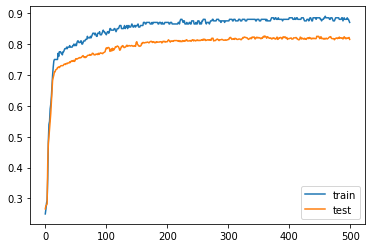

In [9]:
# plot learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## The End